In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

<BarContainer object of 12 artists>

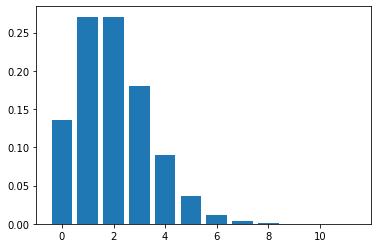

In [2]:
x = np.arange(12)
y = stats.poisson(2).pmf(x)
plt.bar(x,y)

### 1-a. What is the probability that no cars drive up in the noon hour?

In [121]:
# x = 0

stats.poisson(2).pmf(0)

0.1353352832366127

In [122]:
(np.random.poisson(2, 1_000_000) == 0).mean()

0.134887

### 1-b. What is the probability that 3 or more cars come through the drive through?

In [123]:
# x >= 3

stats.poisson(2).sf(2)

0.32332358381693654

In [124]:
cars_drive_up = pd.Series(np.random.poisson(2, 1_000_000))
(cars_drive_up >= 3).mean()

0.323439

### 1-c. How likely is it that the drive through gets at least 1 car?

In [125]:
# x >= 1

stats.poisson(2).sf(0)

0.8646647167633873

In [126]:
cars_drive_up = pd.Series(np.random.poisson(2, 1_000_000))
(cars_drive_up >= 1).mean()

0.864786

### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3.

### 2-a. What grade point average is required to be in the top 5% of the graduating class?

In [127]:
# Silumation

stats.norm(3.0, 0.3).isf(0.05)

3.4934560880854417

In [128]:
# Experiment

grades = np.random.normal(3.0, 0.3, 1000000)
np.percentile(grades,95)

3.493489994684347

### 2-b What GPA constitutes the bottom 15% of the class?

In [129]:
# Simulation

stats.norm(3.0, 0.3).ppf(0.15)

2.689069983151863

In [130]:
# Experiment

grades = np.random.normal(3.0, 0.3, 1000000)
np.percentile(grades,15)

2.689192305517786

### 2-c. An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [131]:
stats.norm(3.0,0.3).ppf(0.2) < 2.8 < stats.norm(3.0,0.3).ppf(0.3)

True

In [132]:
grades = np.random.normal(3.0, 0.3, 1000000)

percentile_20 = np.percentile(grades,20)
percentile_30 = np.percentile(grades,30)
percentile_20 < 2.8 < percentile_30

True

### 2-d If I have a GPA of 3.5, what percentile am I in?

In [133]:
stats.norm(3.0,0.3).sf(3.5)

0.0477903522728147

In [135]:
grades = np.random.normal(3.0, 0.3, 1000000)

(grades > 3.5).mean()

0.047842

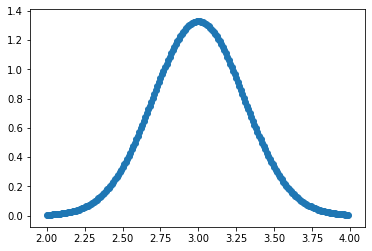

In [5]:
x = np.arange(2,4,0.01)
y = stats.norm(3.0,0.3).pdf(x)
plt.scatter(x,y)

### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [136]:
p_click = 0.02
trials = 4326
stats.binom(trials, p_click).sf(96)

0.1397582363130086

In [137]:
n_trials = nrows = 10000
ncols = 4326

(np.random.choice(a=[1,0],size=(nrows, ncols), p=[0.02, 0.98]).sum(axis=1) >= 97).mean()

0.1412

### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

### What is the probability that at least one of your first 60 answers is correct?

In [138]:
p = 1/101
trials = 60
stats.binom(trials, p).sf(0)

0.44955038406224

In [20]:
n_trials = nrows = 1000000
ncols = 60

((np.random.choice(a=[1,0],size=(nrows, ncols), p=[1/101, 100/101])).sum(axis=1) >=1).mean()

0.44977

### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 
### 5-a. How likely is it that the break area gets cleaned up each day? 

In [31]:
# get cleaned up or not --> binomial distribution

p = 0.03
n_trials = students_visit_break_area = round(3*22*0.9)

stats.binom(n_trials, p).sf(0)

0.8342199288437355

In [33]:
nrows = 10000
ncols = students_visit_break_area

visit_and_clean = np.random.choice(a=[1,0], size=(nrows, ncols), p=[0.03, 0.97])
(visit_and_clean.sum(axis=1) >= 1).mean()

0.83

### 5-b. How likely is it that it goes two days without getting cleaned up?

In [37]:
p_clean = 0.8342199288437355
trials = 2

stats.binom(trials, p).cdf(0)

0.027483031992576113

In [48]:
nrows = 10000
ncols = 2

two_days_not_clean = np.random.choice(a=[1,0],size=(nrows,ncols), p=(p_clean, 1-p_clean))
(two_days_not_clean.sum(axis=1) == 0).mean()

0.0257

### 5-c. All week?

In [46]:
p_clean = 0.8342199288437355
trials = 7

stats.binom(trials, p).cdf(0)

3.441329456987961e-06

In [47]:
nrows = 10000
ncols = 7

two_days_not_clean = np.random.choice(a=[1,0],size=(nrows,ncols), p=(p_clean, 1-p_clean))
(two_days_not_clean.sum(axis=1) == 0).mean()

0.0

### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3.
### If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class?
### Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [59]:
# statistics for people in the line
mean_line = 15
std_line = 3

# transform to time for getting the food
mean_time = 15*2 + 10
std_time = 3*2

stats.norm(mean_time, std_time).sf(45)

0.20232838096364308

In [57]:
(np.random.normal(loc=mean_time, scale=std_time, size=10000) > 45).mean()

0.1975

### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [68]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'
    
query = '''select avg(salary), stddev(salary) from salaries where to_date > curdate()'''

salary_stats = pd.read_sql(query, url)
salary_stats

,avg(salary),stddev(salary)
0,72012.2359,17309.959336


In [69]:
mean = salary_stats.iloc[0,0]
std = salary_stats.iloc[0,1]
print(mean, std)

72012.2359 17309.95933634675


### a. What percent of employees earn less than 60,000?

In [70]:
stats.norm(mean, std).cdf(59999)

0.24383885607466338

In [89]:
salaries = np.random.normal(loc=mean, scale=std, size=10000)
(salaries < 60000).mean()

0.2474

### b. What percent of employees earn more than 95,000?

In [76]:
stats.norm(mean, std).sf(95000)

0.09208773564924777

In [96]:
salaries = np.random.normal(loc=mean, scale=std, size=1000000)
(salaries > 95000).mean()

0.092075

### c. What percent of employees earn between 65,000 and 80,000?

In [93]:
between = stats.norm(mean, std).cdf(([65000,80000]))
between[1] - between[0]

0.3350612231883823

In [100]:
salaries = np.random.normal(loc=mean, scale=std, size=1000000)
((65000 <= salaries) & (salaries <= 80000)).mean()

0.334795

### d. What do the top 5% of employees make?

In [118]:
stats.norm(mean, std).isf(0.05)

100484.58529677246

In [115]:
salaries = np.random.normal(loc=mean, scale=std, size=100000000)
np.percentile(salaries, 95)

100485.18450434522